# Capstone project -The battle of neighborhoods

### Applied data science by IBM, Coursera

## Table of contents
1. Inroduction-Buiseness problem
2. Data
3. Methodology
4. Analysis
5. Results and discussion
6. Conclusion

## Introduction- Buisiness problem

### This project aims to select the safest community area in Chicago based on the total crimes, explore the neighborhoods of that Community area to find the 10 most common venues in each neighborhood and finally cluster the neighborhoods using k-mean clustering.<br><br>This report will be targeted to people who are looking to relocate to Chicago. Inorder to finalise a neighborhood to hunt for an apartment, safety is considered as a top concern when moving to a new place. The crime statistics will provide an insight into this issue.<br><br>We will focus on the safest community area and explore its neighborhoods and the 10 most common venues in each neighborhood so that the best neighborhood suited to an individual's needs can be selected.

## Data

###  Based on definition of our problem, factors that will influence our decision are:
The total number of crimes commited in each of the community areas during the year 2017.<br>
The most common venues in each of the neighborhood in the safest community area are selected.<br>
Following data sources will be needed to extract/generate the required information:
---
* Part 1: Preprocessing a real world data set from Kaggle showing the Chicago Crimes from 2001: A dataset consisting of the crime statistics of each community area in Chicago obtained from Kaggle
* Part 2: Scraping additional information of the different community areas in Chicago from a Wikipedia page.
* Part 3: Creating a new dataset of the Neighborhoods of the safest communty in Chicago and generating their co-ordinates.: Co-ordinate of neighborhood will be obtained from internet.

### Part 1: Preprocessing a real world data set from Kaggle showing the 1chicago Crimes from 2001<br>
<h4>Chicago Crime Data</h4><br>
About this file

* ID - Unique identifier for the record.
* Case number- The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
* Date-Date when the incident occurred. this is sometimes a best estimate.
* Primary type-The primary description of the IUCR code.
* Beat- Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.
* District- Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.
* Community area-Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.
* Year- The year of crime.
* FBI code-Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.<br>
<br>Data set URL: https://www.kaggle.com/chicago/chicago-crime

#### Import necessary libraries:

In [3]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

!conda install -c conda-forge geocoder --yes
import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.1-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


alta

#### Define foursquare credentials and version

In [4]:
CLIENT_ID = '4QPN4IRRHKWZOITPBE54H1GRUOMRTEKZ14IXORU4XR53CHZI' # your Foursquare ID
CLIENT_SECRET = 'YGPUZV4JMPXMC5OAEA5YQTHHBBJTWQNEU1CN3W0WYUVJUN4M' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4QPN4IRRHKWZOITPBE54H1GRUOMRTEKZ14IXORU4XR53CHZI
CLIENT_SECRET:YGPUZV4JMPXMC5OAEA5YQTHHBBJTWQNEU1CN3W0WYUVJUN4M


#### Read in the dataset 

In [5]:
# The code was removed by Watson Studio for sharing.

,ID,Case Number,Date,Primary Type,Beat,District,Community Area,FBI Code,Year
0,11034701,JA366925,01-01-2001,DECEPTIVE PRACTICE,412,4,45.0,11,2001
1,11227287,JB147188,10-08-2017,CRIM SEXUAL ASSAULT,2222,22,73.0,2,2017
2,11227583,JB147595,03/28/2017 02:00:00 PM,BURGLARY,835,8,70.0,5,2017
3,11227293,JB147230,09-09-2017,THEFT,313,3,42.0,6,2017
4,11227634,JB147599,08/26/2017 10:00:00 AM,CRIM SEXUAL ASSAULT,122,1,32.0,2,2017


#### Accessing the most recent crime rates

In [6]:
# Taking only the most recent year (2017) and dropping the rest
df.drop(df.index[df['Year'] != 2017], inplace = True)

# Reset the index and dropping the previous index
df = df.reset_index(drop=True)

In [7]:
# Shape of the data frame
df.shape

(243519, 9)

In [8]:
# View the top of the dataset 
df.head()

,ID,Case Number,Date,Primary Type,Beat,District,Community Area,FBI Code,Year
0,11227287,JB147188,10-08-2017,CRIM SEXUAL ASSAULT,2222,22,73.0,2,2017
1,11227583,JB147595,03/28/2017 02:00:00 PM,BURGLARY,835,8,70.0,5,2017
2,11227293,JB147230,09-09-2017,THEFT,313,3,42.0,6,2017
3,11227634,JB147599,08/26/2017 10:00:00 AM,CRIM SEXUAL ASSAULT,122,1,32.0,2,2017
4,11227508,JB146365,01-01-2017,OFFENSE INVOLVING CHILDREN,1033,10,30.0,2,2017


#### Total number of crimes in each Community area

In [9]:
df['Community Area'].value_counts()

25.0    13929
8.0     11061
32.0     9585
29.0     8260
28.0     8190
43.0     7858
24.0     7585
23.0     7348
71.0     6833
67.0     6365
49.0     6316
69.0     5872
44.0     5785
68.0     5437
66.0     5262
6.0      5245
26.0     4941
22.0     4660
27.0     4386
61.0     4273
46.0     4155
30.0     4152
19.0     4150
7.0      4013
1.0      3814
53.0     3663
42.0     3530
3.0      3229
2.0      3226
38.0     3116
        ...  
51.0     1577
41.0     1562
76.0     1538
20.0     1388
17.0     1388
39.0     1368
60.0     1357
5.0      1298
48.0     1251
54.0     1226
45.0     1160
52.0     1093
50.0      996
10.0      977
59.0      966
11.0      949
34.0      926
62.0      924
13.0      882
72.0      833
64.0      816
37.0      808
57.0      758
36.0      629
55.0      615
18.0      541
74.0      531
12.0      486
47.0      338
9.0       252
Name: Community Area, Length: 77, dtype: int64

#### The total number crimes per primary type

In [10]:
df['Primary Type'].value_counts()

THEFT                                58041
BATTERY                              45140
CRIMINAL DAMAGE                      26551
ASSAULT                              17770
DECEPTIVE PRACTICE                   17084
OTHER OFFENSE                        15721
BURGLARY                             11836
NARCOTICS                            10874
ROBBERY                              10701
MOTOR VEHICLE THEFT                  10185
CRIMINAL TRESPASS                     6248
WEAPONS VIOLATION                     4308
OFFENSE INVOLVING CHILDREN            2062
CRIM SEXUAL ASSAULT                   1455
PUBLIC PEACE VIOLATION                1406
INTERFERENCE WITH PUBLIC OFFICER       997
SEX OFFENSE                            938
PROSTITUTION                           666
ARSON                                  420
GAMBLING                               188
STALKING                               179
LIQUOR LAW VIOLATION                   177
KIDNAPPING                             174
INTIMIDATIO

#### Pivoting the table to view the no. of crimes for each major category in each Community area

In [11]:
Chicago_crime = pd.pivot_table(df,
                               index=['Community Area'],
                               columns=['Primary Type'],
                               aggfunc=np.sum,fill_value=0)
#Chicago_crime.drop('CONCEALED CARRY LISCENCE VIOLATION',inplace= True)
Chicago_crime.head()

Beat                            \
Primary Type   ARSON ASSAULT  BATTERY BURGLARY   
Community Area                                   
1.0             2423  606326  1549923   419568   
2.0             2411  535952  1263620   420465   
3.0             1914  479427  1173212   285036   
4.0             4063  225057   511664   205114   
5.0             1921  109399   207378   224630   

                                                                      \
Primary Type   CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Community Area                                                         
1.0                                            0               72774   
2.0                                            0               37788   
3.0                                            0               87848   
4.0                                            0               38012   
5.0                                            0               15350   

                                                                          \
Primary Type   CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Community Area                                                             
1.0                    1280483                    4848            407476   
2.0                    1021174                    2411            267731   
3.0                     571137                       0            212082   
4.0                     364044                    2011            135412   
5.0                     224707                    1931             78767   

                                   ...                     Year                \
Primary Type   DECEPTIVE PRACTICE  ... OTHER NARCOTIC VIOLATION OTHER OFFENSE   
Community Area                     ...                                          
1.0                        609077  ...                     2017        415502   
2.0                        624333  ...                        0        451808   
3.0                        689240  ...                        0        401383   
4.0                        395465  ...                        0        209768   
5.0                        324406  ...                        0        121020   

                                                                             \
Primary Type   PROSTITUTION PUBLIC INDECENCY PUBLIC PEACE VIOLATION ROBBERY   
Community Area                                                                
1.0                    4034                0                  26221  308601   
2.0                    4034                0                  32272  219853   
3.0                    2017                0                  58493  185564   
4.0                       0                0                  12102  116986   
5.0                       0                0                  12102   86731   

                                                                
Primary Type   SEX OFFENSE STALKING    THEFT WEAPONS VIOLATION  
Community Area                                                  
1.0                  56476     2017  2265091             64544  
2.0                  44374     6051  1609566             40340  
3.0                  42357     2017  1774960             40340  
4.0                  12102     6051  1099265             14119  
5.0                   8068     2017   966143              8068  

[5 rows x 132 columns]

In [12]:
# Total crimes per Borough
Chicago_crime['Total'] = Chicago_crime.sum(axis=1)
Chicago_crime.head()

Beat                            \
Primary Type   ARSON ASSAULT  BATTERY BURGLARY   
Community Area                                   
1.0             2423  606326  1549923   419568   
2.0             2411  535952  1263620   420465   
3.0             1914  479427  1173212   285036   
4.0             4063  225057   511664   205114   
5.0             1921  109399   207378   224630   

                                                                      \
Primary Type   CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Community Area                                                         
1.0                                            0               72774   
2.0                                            0               37788   
3.0                                            0               87848   
4.0                                            0               38012   
5.0                                            0               15350   

                                                                          \
Primary Type   CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Community Area                                                             
1.0                    1280483                    4848            407476   
2.0                    1021174                    2411            267731   
3.0                     571137                       0            212082   
4.0                     364044                    2011            135412   
5.0                     224707                    1931             78767   

                                   ...          Year               \
Primary Type   DECEPTIVE PRACTICE  ... OTHER OFFENSE PROSTITUTION   
Community Area                     ...                              
1.0                        609077  ...        415502         4034   
2.0                        624333  ...        451808         4034   
3.0                        689240  ...        401383         2017   
4.0                        395465  ...        209768            0   
5.0                        324406  ...        121020            0   

                                                                            \
Primary Type   PUBLIC INDECENCY PUBLIC PEACE VIOLATION ROBBERY SEX OFFENSE   
Community Area                                                               
1.0                           0                  26221  308601       56476   
2.0                           0                  32272  219853       44374   
3.0                           0                  58493  185564       42357   
4.0                           0                  12102  116986       12102   
5.0                           0                  12102   86731        8068   

                                                          Total  
Primary Type   STALKING    THEFT WEAPONS VIOLATION               
Community Area                                                   
1.0                2017  2265091             64544  41963506440  
2.0                6051  1609566             40340  35488062177  
3.0                2017  1774960             40340  35531896747  
4.0                6051  1099265             14119  19826872111  
5.0                2017   966143              8068  14284483023  

[5 rows x 133 columns]

#### Removing the multi index

In [13]:
Chicago_crime.columns = Chicago_crime.columns.map(''.join)
#Chicago_crime.drop(['BeatCONCEALED CARRY LICENSE VIOLATION','YearPUBLIC INDECENCY'],axis=1)
Chicago_crime.head()

,BeatARSON,BeatASSAULT,BeatBATTERY,BeatBURGLARY,BeatCONCEALED CARRY LICENSE VIOLATION,BeatCRIM SEXUAL ASSAULT,BeatCRIMINAL DAMAGE,BeatCRIMINAL SEXUAL ASSAULT,BeatCRIMINAL TRESPASS,BeatDECEPTIVE PRACTICE,...,YearOTHER OFFENSE,YearPROSTITUTION,YearPUBLIC INDECENCY,YearPUBLIC PEACE VIOLATION,YearROBBERY,YearSEX OFFENSE,YearSTALKING,YearTHEFT,YearWEAPONS VIOLATION,Total
Community Area,,,,,,,,,,,,,,,,,,,,,
1.0,2423,606326,1549923,419568,0,72774,1280483,4848,407476,609077,...,415502,4034,0,26221,308601,56476,2017,2265091,64544,41963506440
2.0,2411,535952,1263620,420465,0,37788,1021174,2411,267731,624333,...,451808,4034,0,32272,219853,44374,6051,1609566,40340,35488062177
3.0,1914,479427,1173212,285036,0,87848,571137,0,212082,689240,...,401383,2017,0,58493,185564,42357,2017,1774960,40340,35531896747
4.0,4063,225057,511664,205114,0,38012,364044,2011,135412,395465,...,209768,0,0,12102,116986,12102,6051,1099265,14119,19826872111
5.0,1921,109399,207378,224630,0,15350,224707,1931,78767,324406,...,121020,0,0,12102,86731,8068,2017,966143,8068,14284483023


In [14]:
Chicago_crime.shape

(77, 133)

### Part 2: Scraping additional information of the different community areas in Chicago from a Wikipedia page


URL:https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago

In [15]:

body = client_85b0b417e6084704812523629314bce7.get_object(Bucket='capstone1-donotdelete-pr-impkhljul5pjyi',Key='COmmunity_areas.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Chicago_table = pd.read_excel(body)
Chicago_table.head()


,Number[8],Name[8],2017 population[9],Area (sq mi.)[10],Area (km2),2017 population,2017 population.1
0,NaN,NaN,NaN,NaN,NaN,density (/sq mi.),density (/km2)
1,1.0,Rogers Park,55062.0,1.84,4.77,29925,11554.1
2,2.0,West Ridge,76215.0,3.53,9.14,21590.7,8336.2
3,3.0,Uptown,57973.0,2.32,6.01,24988.4,9648.06
4,4.0,Lincoln Square,41715.0,2.56,6.63,16294.9,6291.5


#### Renaming the columns

In [16]:
Chicago_table.columns=('Community Area','name','population in 2017','area(sq mi.)','Area(km2)','2017 population density/sq mi.','2017 popualation density/km2')
Chicago_table=Chicago_table.drop(Chicago_table.index[0])
Chicago_table.head()

,Community Area,name,population in 2017,area(sq mi.),Area(km2),2017 population density/sq mi.,2017 popualation density/km2
1,1.0,Rogers Park,55062.0,1.84,4.77,29925,11554.1
2,2.0,West Ridge,76215.0,3.53,9.14,21590.7,8336.2
3,3.0,Uptown,57973.0,2.32,6.01,24988.4,9648.06
4,4.0,Lincoln Square,41715.0,2.56,6.63,16294.9,6291.5
5,5.0,North Center,35789.0,2.05,5.31,17458,6740.59


In [17]:
Chicago_table.tail()

,Community Area,name,population in 2017,area(sq mi.),Area(km2),2017 population density/sq mi.,2017 popualation density/km2
73,73.0,Washington Heights,27453.0,2.86,7.41,9598.95,3706.18
74,74.0,Mount Greenwood,19277.0,2.71,7.02,7113.28,2746.45
75,75.0,Morgan Park,22394.0,3.30,8.55,6786.06,2620.11
76,76.0,O'Hare,12377.0,13.34,34.55,927.81,358.23
77,77.0,Edgewater,55965.0,1.74,4.51,32163.8,12418.5


#### View the infromation on the dataset

In [18]:
Chicago_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 1 to 77
Data columns (total 7 columns):
Community Area                    77 non-null float64
name                              77 non-null object
population in 2017                77 non-null float64
area(sq mi.)                      77 non-null float64
Area(km2)                         77 non-null float64
2017 population density/sq mi.    77 non-null object
2017 popualation density/km2      77 non-null object
dtypes: float64(4), object(3)
memory usage: 4.8+ KB


#### Check if the number of community areas are same 
We already know that there are 77 community area in df dataframe and there are 77 rows indicating 77 community areas in Chicago_table dataframe.
So, the number of community area are same.

#### Combine both the dataframes

In [19]:
chi_crime = pd.merge(Chicago_crime, Chicago_table, on='Community Area')
chi_crime.head(10)

,Community Area,BeatARSON,BeatASSAULT,BeatBATTERY,BeatBURGLARY,BeatCONCEALED CARRY LICENSE VIOLATION,BeatCRIM SEXUAL ASSAULT,BeatCRIMINAL DAMAGE,BeatCRIMINAL SEXUAL ASSAULT,BeatCRIMINAL TRESPASS,...,YearSTALKING,YearTHEFT,YearWEAPONS VIOLATION,Total,name,population in 2017,area(sq mi.),Area(km2),2017 population density/sq mi.,2017 popualation density/km2
0,1.0,2423,606326,1549923,419568,0,72774,1280483,4848,407476,...,2017,2265091,64544,41963506440,Rogers Park,55062.0,1.84,4.77,29925,11554.1
1,2.0,2411,535952,1263620,420465,0,37788,1021174,2411,267731,...,6051,1609566,40340,35488062177,West Ridge,76215.0,3.53,9.14,21590.7,8336.2
2,3.0,1914,479427,1173212,285036,0,87848,571137,0,212082,...,2017,1774960,40340,35531896747,Uptown,57973.0,2.32,6.01,24988.4,9648.06
3,4.0,4063,225057,511664,205114,0,38012,364044,2011,135412,...,6051,1099265,14119,19826872111,Lincoln Square,41715.0,2.56,6.63,16294.9,6291.5
4,5.0,1921,109399,207378,224630,0,15350,224707,1931,78767,...,2017,966143,8068,14284483023,North Center,35789.0,2.05,5.31,17458,6740.59
5,6.0,3858,373822,1363423,550871,1933,92436,689466,3844,311874,...,10085,4171156,22187,57709165580,Lake View,100470.0,3.12,8.08,32201.9,12433.2
6,7.0,1935,236321,614846,348812,3870,37230,656867,9060,151032,...,6051,4023915,12102,44142705356,Lincoln Park,67710.0,3.16,8.18,21427.2,8273.1
7,8.0,10971,774877,2367928,376467,1824,157407,1023396,9147,592521,...,26221,10575131,50425,121744935707,Near North Side,88893.0,2.74,7.10,32442.7,12526.2
8,9.0,4834,22560,67680,4833,0,4835,54793,0,16112,...,0,123037,2017,2771709615,Edison Park,11605.0,1.13,2.93,4235.4,1635.3
9,10.0,1611,117757,253221,90371,0,16123,187085,0,49974,...,2017,457859,6051,10751726759,Norwood Park,37089.0,4.37,11.32,8487.19,3276.92


In [20]:
chi_crime.shape

(77, 140)

## Methodology

#### The methodology in this project consists of two parts:

* Exploratory Data Analysis: Visualise the crime rates in the Chicago communities to idenity the safest borough and extract the neighborhoods in that area to find the 10 most common venues in each neighborhood.<br><br>
* Modelling: To help people find similar neighborhoods in the safest community area we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use a cluster size of 5 for this project that will cluster the neighborhoods into 5 clusters. The reason to conduct a K- means clustering is to cluster neighborhoods with similar venues together so that people can shortlist the area of their interests based on the venues/amenities around each neighborhood.

### Exploratory Data Analysis

#### Descriptive statistics of data

In [21]:
chi_crime.describe()

,Community Area,BeatARSON,BeatASSAULT,BeatBATTERY,BeatBURGLARY,BeatCONCEALED CARRY LICENSE VIOLATION,BeatCRIM SEXUAL ASSAULT,BeatCRIMINAL DAMAGE,BeatCRIMINAL SEXUAL ASSAULT,BeatCRIMINAL TRESPASS,...,YearPUBLIC PEACE VIOLATION,YearROBBERY,YearSEX OFFENSE,YearSTALKING,YearTHEFT,YearWEAPONS VIOLATION,Total,population in 2017,area(sq mi.),Area(km2)
count,77.000000,77.000000,7.700000e+01,7.700000e+01,77.000000,77.000000,77.000000,7.700000e+01,77.000000,77.000000,...,77.000000,7.700000e+01,77.000000,77.00000,7.700000e+01,77.000000,7.700000e+01,77.000000,77.000000,77.000000
mean,39.000000,6033.285714,2.478528e+05,6.409228e+05,182623.467532,1087.311688,22733.207792,3.931802e+05,890.116883,94383.155844,...,36829.896104,2.803106e+05,24570.727273,4688.87013,1.520373e+06,112847.220779,3.477787e+10,35347.233766,2.997662,7.763766
std,22.371857,7448.743165,2.776027e+05,7.671015e+05,183967.194760,3534.239385,31020.934660,4.092989e+05,1883.014828,108472.529061,...,39598.577386,2.708369e+05,18398.240966,5718.44783,1.891799e+06,159507.827714,3.007564e+10,22947.281631,1.972510,5.108717
min,1.000000,0.000000,1.192600e+04,2.297400e+04,4474.000000,0.000000,0.000000,1.777600e+04,0.000000,413.000000,...,2017.000000,4.034000e+03,0.000000,0.00000,7.462900e+04,2017.000000,2.771710e+09,2254.000000,0.580000,1.500000
25%,20.000000,1383.000000,6.153800e+04,1.360570e+05,42009.000000,0.000000,3295.000000,8.321700e+04,0.000000,22603.000000,...,10085.000000,8.673100e+04,10085.000000,2017.00000,4.881140e+05,20170.000000,1.275338e+10,19019.000000,1.780000,4.610000
50%,39.000000,2736.000000,1.515420e+05,3.945980e+05,130626.000000,0.000000,10118.000000,2.700340e+05,0.000000,55484.000000,...,22187.000000,1.916150e+05,18153.000000,2017.00000,1.034721e+06,48408.000000,2.430182e+10,29929.000000,2.860000,7.410000
75%,58.000000,10092.000000,3.736560e+05,9.424190e+05,247631.000000,612.000000,27748.000000,5.711370e+05,934.000000,126940.000000,...,52442.000000,3.973490e+05,38323.000000,6051.00000,1.629736e+06,114969.000000,4.698124e+10,46278.000000,3.550000,9.190000
max,77.000000,37760.000000,1.848355e+06,5.307395e+06,875934.000000,26436.000000,157407.000000,2.593364e+06,9147.000000,592521.000000,...,223887.000000,1.488546e+06,90765.000000,26221.00000,1.069010e+07,828987.000000,1.531241e+11,100470.000000,13.340000,34.550000


In [22]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.0.2


#### Sort the data in descending order to see 5 community areas of highest crime

In [23]:
chi_crime.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

df_top5 = chi_crime.head() 
df_top5

,Community Area,BeatARSON,BeatASSAULT,BeatBATTERY,BeatBURGLARY,BeatCONCEALED CARRY LICENSE VIOLATION,BeatCRIM SEXUAL ASSAULT,BeatCRIMINAL DAMAGE,BeatCRIMINAL SEXUAL ASSAULT,BeatCRIMINAL TRESPASS,...,YearSTALKING,YearTHEFT,YearWEAPONS VIOLATION,Total,name,population in 2017,area(sq mi.),Area(km2),2017 population density/sq mi.,2017 popualation density/km2
24,25.0,37760,1848355,5307395,875934,8622,156293,2593364,8097,422260,...,8068,3898861,828987,153124133159,Austin,95260.0,7.15,18.52,13323.1,5144.07
7,8.0,10971,774877,2367928,376467,1824,157407,1023396,9147,592521,...,26221,10575131,50425,121744935707,Near North Side,88893.0,2.74,7.10,32442.7,12526.2
31,32.0,337,49144,99672,11473,0,4439,43106,111,25561,...,12102,10690100,24204,105455734827,(The) Loop[11],35880.0,1.65,4.27,21745.5,8395.97
28,29.0,18114,636886,1924505,246897,2035,50532,784403,1011,263012,...,2017,1770926,677712,90830462421,North Lawndale,35947.0,3.21,8.31,11198.4,4323.74
27,28.0,2456,527387,1133014,298202,1224,62419,876675,0,182462,...,24204,6139748,104884,90054526315,Near West Side,62872.0,5.69,14.74,11049.6,4266.26


#### visualize the community ares of highest crime

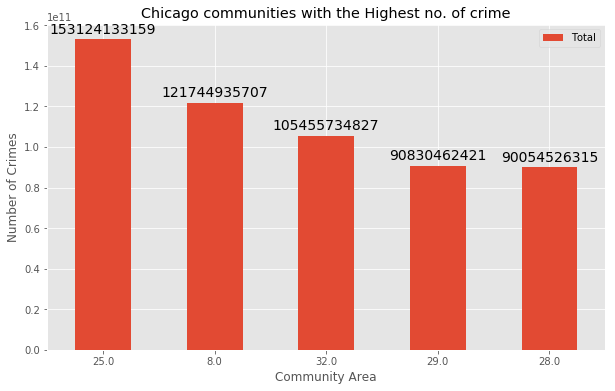

In [24]:
df_tt = df_top5[['Community Area','Total']]

df_tt.set_index('Community Area',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Community Area') # add y-label to the plot
ax.set_title('Chicago communities with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

#### Sort the communities in terms of lowest crimes

In [25]:
chi_crime.sort_values(['Total'], ascending = True, axis = 0, inplace = True )

df_bot5 = chi_crime.head() 
df_bot5

,Community Area,BeatARSON,BeatASSAULT,BeatBATTERY,BeatBURGLARY,BeatCONCEALED CARRY LICENSE VIOLATION,BeatCRIM SEXUAL ASSAULT,BeatCRIMINAL DAMAGE,BeatCRIMINAL SEXUAL ASSAULT,BeatCRIMINAL TRESPASS,...,YearSTALKING,YearTHEFT,YearWEAPONS VIOLATION,Total,name,population in 2017,area(sq mi.),Area(km2),2017 population density/sq mi.,2017 popualation density/km2
8,9.0,4834,22560,67680,4833,0,4835,54793,0,16112,...,0,123037,2017,2771709615,Edison Park,11605.0,1.13,2.93,4235.4,1635.3
46,47.0,413,13436,30973,9938,0,1679,20646,0,413,...,0,74629,46391,3721995273,Burnside,2254.0,0.61,1.58,3695.08,1426.68
11,12.0,1621,55932,70453,71165,0,1621,80969,0,41699,...,0,292465,8068,5348571471,Forest Glen,19019.0,3.20,8.29,5943.44,2294.78
73,74.0,2211,92862,176880,42009,0,0,128238,0,53064,...,2017,296499,4034,5837476518,Mount Greenwood,19277.0,2.71,7.02,7113.28,2746.45
17,18.0,0,85397,308928,102971,0,7534,200934,0,22603,...,0,185564,6051,5940545598,Montclare,13830.0,0.99,2.56,13969.7,5393.73


#### Visualize the safest community areas

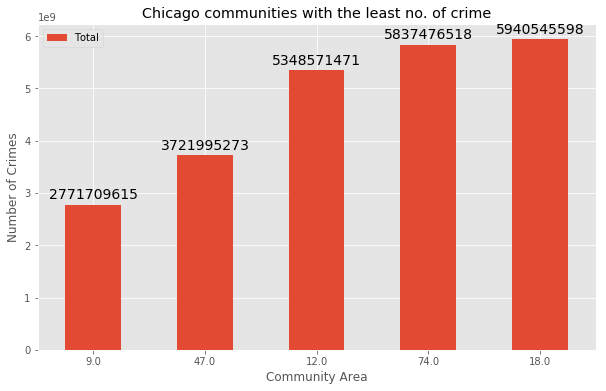

In [26]:
df_bt = df_bot5[['Community Area','Total']]

df_bt.set_index('Community Area',inplace = True)

ax = df_bt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Community Area') # add y-label to the plot
ax.set_title('Chicago communities with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

#### The eighteenth community area is the safest Community area.

In [27]:
Chicago_table.loc[18]

Community Area                           18
name                              Montclare
population in 2017                    13830
area(sq mi.)                           0.99
Area(km2)                              2.56
2017 population density/sq mi.      13969.7
2017 popualation density/km2        5393.73
Name: 18, dtype: object

#### Montclare is the safest community area in Chicago but it is on the outskirts of Chicago. So let's focus on the second safest community area , the 47th community area and the 12th community area.


In [29]:
print(Chicago_table.loc[47])
print(Chicago_table.loc[12])

Community Area                          47
name                              Burnside
population in 2017                    2254
area(sq mi.)                          0.61
Area(km2)                             1.58
2017 population density/sq mi.     3695.08
2017 popualation density/km2       1426.68
Name: 47, dtype: object
Community Area                             12
name                              Forest Glen
population in 2017                      19019
area(sq mi.)                              3.2
Area(km2)                                8.29
2017 population density/sq mi.        5943.44
2017 popualation density/km2          2294.78
Name: 12, dtype: object


#### Visualising the types of crimes in Forest Glen as Burnside is very small in term sof area.

In [39]:
Chicago_crime.reset_index(inplace=True)
Chicago_crime.columns

Index(['Community Area', 'BeatARSON', 'BeatASSAULT', 'BeatBATTERY',
       'BeatBURGLARY', 'BeatCONCEALED CARRY LICENSE VIOLATION',
       'BeatCRIM SEXUAL ASSAULT', 'BeatCRIMINAL DAMAGE',
       'BeatCRIMINAL SEXUAL ASSAULT', 'BeatCRIMINAL TRESPASS',
       ...
       'YearOTHER OFFENSE', 'YearPROSTITUTION', 'YearPUBLIC INDECENCY',
       'YearPUBLIC PEACE VIOLATION', 'YearROBBERY', 'YearSEX OFFENSE',
       'YearSTALKING', 'YearTHEFT', 'YearWEAPONS VIOLATION', 'Total'],
      dtype='object', length=134)

In [55]:
df_bc1 =  df_bot5[df_bot5['Community Area'] == 47]

df_bc = df_bc1[['Community Area', 'BeatARSON', 'BeatASSAULT', 'BeatBATTERY',
       'BeatBURGLARY', 
       'YearOTHER OFFENSE', 'YearPROSTITUTION', 'YearPUBLIC INDECENCY',
        'YearROBBERY', 'YearSEX OFFENSE',
       'YearSTALKING', 'YearTHEFT', 'YearWEAPONS VIOLATION']]


df_bc.set_index('Community Area',inplace = True)
df_bc

,BeatARSON,BeatASSAULT,BeatBATTERY,BeatBURGLARY,YearOTHER OFFENSE,YearPROSTITUTION,YearPUBLIC INDECENCY,YearROBBERY,YearSEX OFFENSE,YearSTALKING,YearTHEFT,YearWEAPONS VIOLATION
Community Area,,,,,,,,,,,,
47.0,413,13436,30973,9938,68578,0,0,12102,0,0,74629,46391


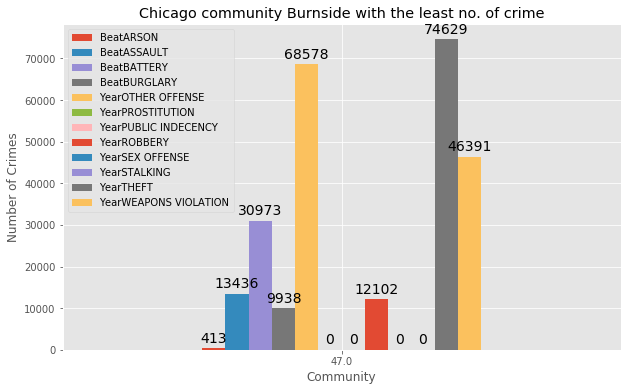

In [57]:
ax = df_bc.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Community') # add y-label to the plot
ax.set_title('Chicago community Burnside with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [58]:
df_bc2 =  df_bot5[df_bot5['Community Area'] == 12]

df_bc = df_bc2[['Community Area', 'BeatARSON', 'BeatASSAULT', 'BeatBATTERY',
       'BeatBURGLARY', 
       'YearOTHER OFFENSE', 'YearPROSTITUTION', 'YearPUBLIC INDECENCY',
        'YearROBBERY', 'YearSEX OFFENSE',
       'YearSTALKING', 'YearTHEFT', 'YearWEAPONS VIOLATION']]


df_bc.set_index('Community Area',inplace = True)
df_bc

,BeatARSON,BeatASSAULT,BeatBATTERY,BeatBURGLARY,YearOTHER OFFENSE,YearPROSTITUTION,YearPUBLIC INDECENCY,YearROBBERY,YearSEX OFFENSE,YearSTALKING,YearTHEFT,YearWEAPONS VIOLATION
Community Area,,,,,,,,,,,,
12.0,1621,55932,70453,71165,62527,0,0,12102,4034,0,292465,8068


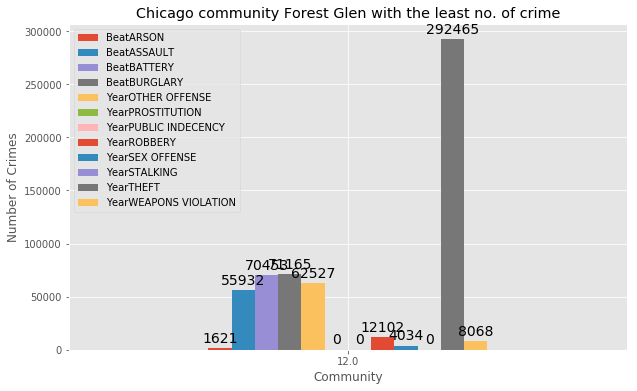

In [60]:
ax = df_bc.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Community') # add y-label to the plot
ax.set_title('Chicago community Forest Glen with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

We can conclude that both Forest Glen and Burnside are the safest communities when compared to the other communities in Chicago.

### Part 3: Creating a new dataset of neighborhoods of the safest communities in Chicago and generating their coordinates

The list of Neighborhoods in the community area of Burnside and Forest Glen was found on a wikipedia page:
https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago

In [62]:
Neighborhood = ['Burnside','Edgebrook','North Edgebrook','South Edgebrook','Forest Glen','Old Edgebrook',
'Wildwood','Sauganash']

Community = ['Burnside','Forest Glen','Forest Glen','Forest Glen','Forest Glen','Forest Glen','Forest Glen','Forest Glen']

Latitude = ['','','','','','','','']
Longitude = ['','','','','','','','']

df_neigh = {'Neighborhood': Neighborhood,'Community':Community,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Community', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Community,Latitude,Longitude
0,Burnside,Burnside,,
1,Edgebrook,Forest Glen,,
2,North Edgebrook,Forest Glen,,
3,South Edgebrook,Forest Glen,,
4,Forest Glen,Forest Glen,,
5,Old Edgebrook,Forest Glen,,
6,Wildwood,Forest Glen,,
7,Sauganash,Forest Glen,,


#### Find the coordinates of each neighborhood

In [63]:
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},Chicago,Illinois'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[41.7300345, 41.9996772, 41.998269, 41.989607899999996, 41.991751550000004, 41.9947082, 42.00469075, 41.9900357] [-87.596714, -87.7641002, -87.7659761, -87.75468774286338, -87.75167396842738, -87.7677272, -87.77592449680378, -87.7422893]


In [64]:
df_neigh = {'Neighborhood': Neighborhood,'Community':Community,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Community', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Community,Latitude,Longitude
0,Burnside,Burnside,41.730035,-87.596714
1,Edgebrook,Forest Glen,41.999677,-87.764100
2,North Edgebrook,Forest Glen,41.998269,-87.765976
3,South Edgebrook,Forest Glen,41.989608,-87.754688
4,Forest Glen,Forest Glen,41.991752,-87.751674
5,Old Edgebrook,Forest Glen,41.994708,-87.767727
6,Wildwood,Forest Glen,42.004691,-87.775924
7,Sauganash,Forest Glen,41.990036,-87.742289


#### Visualize the neighborhoods

In [72]:
# create map of New York using latitude and longitude values
map_lon = folium.Map(location=[41.881493, -87.658225], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(kut_neig['Latitude'], kut_neig['Longitude'], kut_neig['Community'], kut_neig['Neighborhood']):
    label = '{}, {}'.format(neighborhood, Community)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

## Modeling

* Finding all the venues within a 500 meter radius of each neighborhood.
* Perform one hot ecoding on the venues data.
* Grouping the venues by the neighborhood and calculating their mean.
* Performing a K-means clustering (Defining K = 3)

#### Create a function to extract venues from each neighborhood

In [74]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
        
    return(nearby_venues)

In [75]:
kut_venues = getNearbyVenues(names=kut_neig['Neighborhood'],
                                   latitudes=kut_neig['Latitude'],
                                   longitudes=kut_neig['Longitude']
                                  )

Burnside
Edgebrook
North Edgebrook
South Edgebrook
Forest Glen
Old Edgebrook
Wildwood
Sauganash


In [76]:
print(kut_venues.shape)
kut_venues.head()

(90, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Burnside,41.730035,-87.596714,Captain Clean,41.728278,-87.598975,Home Service
1,Burnside,41.730035,-87.596714,93rd St. & Cottage Grove Ave.,41.728274,-87.600860,Intersection
2,Burnside,41.730035,-87.596714,Cta Training Center,41.733666,-87.595408,Bus Station
3,Burnside,41.730035,-87.596714,Metra - 91st Street (Chesterfield),41.730079,-87.601962,Train Station
4,Edgebrook,41.999677,-87.764100,Chocolate Shoppe Ice Cream,41.997200,-87.762554,Ice Cream Shop


In [77]:
kut_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Burnside,4,4,4,4,4,4
Edgebrook,23,23,23,23,23,23
Forest Glen,9,9,9,9,9,9
North Edgebrook,22,22,22,22,22,22
Old Edgebrook,17,17,17,17,17,17
Sauganash,7,7,7,7,7,7
South Edgebrook,3,3,3,3,3,3
Wildwood,5,5,5,5,5,5


In [78]:
print('There are {} uniques categories.'.format(len(kut_venues['Venue Category'].unique())))

There are 38 uniques categories.


#### One hot encoding
URL: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [79]:
kut_onehot = pd.get_dummies(kut_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kut_onehot['Neighborhood'] = kut_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kut_onehot.columns[-1]] + list(kut_onehot.columns[:-1])
kut_onehot = kut_onehot[fixed_columns]

kut_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Baseball Field,Basketball Court,Bus Station,Coffee Shop,Diner,Farmers Market,Fast Food Restaurant,...,Sandwich Place,Smoke Shop,Spa,Sports Bar,Thai Restaurant,Theater,Trail,Train Station,Vietnamese Restaurant,Yoga Studio
0,Burnside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Burnside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Burnside,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Burnside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Edgebrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [80]:
kut_grouped = kut_onehot.groupby('Neighborhood').mean().reset_index()
kut_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Baseball Field,Basketball Court,Bus Station,Coffee Shop,Diner,Farmers Market,Fast Food Restaurant,...,Sandwich Place,Smoke Shop,Spa,Sports Bar,Thai Restaurant,Theater,Trail,Train Station,Vietnamese Restaurant,Yoga Studio
0,Burnside,0.000000,0.000000,0.0,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.250000,0.000000,0.000000
1,Edgebrook,0.043478,0.000000,0.0,0.000000,0.043478,0.043478,0.043478,0.043478,0.000000,...,0.086957,0.000000,0.086957,0.043478,0.043478,0.0,0.043478,0.043478,0.043478,0.000000
2,Forest Glen,0.000000,0.111111,0.0,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.111111
3,North Edgebrook,0.045455,0.000000,0.0,0.000000,0.045455,0.045455,0.045455,0.000000,0.000000,...,0.090909,0.045455,0.045455,0.045455,0.000000,0.0,0.045455,0.045455,0.045455,0.000000
4,Old Edgebrook,0.000000,0.000000,0.0,0.000000,0.058824,0.058824,0.058824,0.000000,0.000000,...,0.117647,0.058824,0.058824,0.000000,0.000000,0.0,0.058824,0.058824,0.058824,0.000000
5,Sauganash,0.000000,0.142857,0.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,South Edgebrook,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7,Wildwood,0.200000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000


In [81]:
num_top_venues = 5

for hood in kut_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kut_grouped[kut_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Burnside----
                 venue  freq
0        Train Station  0.25
1          Bus Station  0.25
2         Intersection  0.25
3         Home Service  0.25
4  American Restaurant  0.00


----Edgebrook----
                 venue  freq
0       Sandwich Place  0.09
1                  Spa  0.09
2  American Restaurant  0.04
3        Grocery Store  0.04
4                 Park  0.04


----Forest Glen----
                  venue  freq
0           Yoga Studio  0.11
1  Fast Food Restaurant  0.11
2      Asian Restaurant  0.11
3         Moving Target  0.11
4     Indian Restaurant  0.11


----North Edgebrook----
            venue  freq
0            Park  0.09
1  Sandwich Place  0.09
2      Sports Bar  0.05
3      Playground  0.05
4           Plaza  0.05


----Old Edgebrook----
            venue  freq
0  Sandwich Place  0.12
1     Gas Station  0.06
2      Restaurant  0.06
3      Smoke Shop  0.06
4             Spa  0.06


----Sauganash----
               venue  freq
0               Park  0.29
1

#### Create a new dataframe for the venues

In [82]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each neighborhood

In [83]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kut_grouped['Neighborhood']

for ind in np.arange(kut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Burnside,Train Station,Home Service,Bus Station,Intersection,Yoga Studio,Gas Station,Ice Cream Shop,Hobby Shop,Gym,Grocery Store
1,Edgebrook,Spa,Sandwich Place,American Restaurant,Plaza,Vietnamese Restaurant,Diner,Optical Shop,Coffee Shop,Park,Bus Station
2,Forest Glen,Yoga Studio,Indian Restaurant,Asian Restaurant,Coffee Shop,Fast Food Restaurant,Golf Course,Grocery Store,Gym,Moving Target,Sandwich Place
3,North Edgebrook,Sandwich Place,Park,American Restaurant,Plaza,Hobby Shop,Gas Station,Ice Cream Shop,Vietnamese Restaurant,Diner,Coffee Shop
4,Old Edgebrook,Sandwich Place,Salon / Barbershop,Diner,Park,Coffee Shop,Bus Station,Hobby Shop,Restaurant,Plaza,Smoke Shop


### Clustering similar neighborhoods together using k - means clustering

In [85]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

kut_grouped_clustering = kut_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

In [86]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kut_merged = kut_neig

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kut_merged = kut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kut_merged.head() # check the last columns!

,Neighborhood,Community,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Burnside,Burnside,41.730035,-87.596714,2,Train Station,Home Service,Bus Station,Intersection,Yoga Studio,Gas Station,Ice Cream Shop,Hobby Shop,Gym,Grocery Store
1,Edgebrook,Forest Glen,41.999677,-87.764100,0,Spa,Sandwich Place,American Restaurant,Plaza,Vietnamese Restaurant,Diner,Optical Shop,Coffee Shop,Park,Bus Station
2,North Edgebrook,Forest Glen,41.998269,-87.765976,0,Sandwich Place,Park,American Restaurant,Plaza,Hobby Shop,Gas Station,Ice Cream Shop,Vietnamese Restaurant,Diner,Coffee Shop
3,South Edgebrook,Forest Glen,41.989608,-87.754688,1,Moving Target,Other Great Outdoors,Golf Course,Gas Station,Ice Cream Shop,Home Service,Hobby Shop,Gym,Grocery Store,Fast Food Restaurant
4,Forest Glen,Forest Glen,41.991752,-87.751674,0,Yoga Studio,Indian Restaurant,Asian Restaurant,Coffee Shop,Fast Food Restaurant,Golf Course,Grocery Store,Gym,Moving Target,Sandwich Place


In [87]:
#drop empty rows
kut_merged.dropna(inplace = True)

In [88]:
kut_merged.shape

(8, 15)

In [89]:
kut_merged['Cluster Labels'] = kut_merged['Cluster Labels'].astype(int)

In [90]:
kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 15 columns):
Neighborhood              8 non-null object
Community                 8 non-null object
Latitude                  8 non-null float64
Longitude                 8 non-null float64
Cluster Labels            8 non-null int64
1st Most Common Venue     8 non-null object
2nd Most Common Venue     8 non-null object
3rd Most Common Venue     8 non-null object
4th Most Common Venue     8 non-null object
5th Most Common Venue     8 non-null object
6th Most Common Venue     8 non-null object
7th Most Common Venue     8 non-null object
8th Most Common Venue     8 non-null object
9th Most Common Venue     8 non-null object
10th Most Common Venue    8 non-null object
dtypes: float64(2), int64(1), object(12)
memory usage: 1.0+ KB


### Visualize the clusters

In [92]:
# create map
map_clusters = folium.Map(location=[41.881493, -87.658225], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kut_merged['Latitude'], kut_merged['Longitude'], kut_merged['Neighborhood'], kut_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

Each cluster is color coded for the ease of presentation, we can see that majority of the neighborhood falls in the red cluster which is the first cluster. Two neighborhoods have their own cluster (Green and Blue), these are clusters two and three. 

## Analysis

Analyse each of the clusters to identify the characteristics of each cluster and the neighborhoods in them.

#### Examine the first cluster

In [93]:
kut_merged[kut_merged['Cluster Labels'] == 0]

,Neighborhood,Community,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Edgebrook,Forest Glen,41.999677,-87.764100,0,Spa,Sandwich Place,American Restaurant,Plaza,Vietnamese Restaurant,Diner,Optical Shop,Coffee Shop,Park,Bus Station
2,North Edgebrook,Forest Glen,41.998269,-87.765976,0,Sandwich Place,Park,American Restaurant,Plaza,Hobby Shop,Gas Station,Ice Cream Shop,Vietnamese Restaurant,Diner,Coffee Shop
4,Forest Glen,Forest Glen,41.991752,-87.751674,0,Yoga Studio,Indian Restaurant,Asian Restaurant,Coffee Shop,Fast Food Restaurant,Golf Course,Grocery Store,Gym,Moving Target,Sandwich Place
5,Old Edgebrook,Forest Glen,41.994708,-87.767727,0,Sandwich Place,Salon / Barbershop,Diner,Park,Coffee Shop,Bus Station,Hobby Shop,Restaurant,Plaza,Smoke Shop
6,Wildwood,Forest Glen,42.004691,-87.775924,0,American Restaurant,Nature Preserve,Baseball Field,Theater,Park,Gas Station,Home Service,Hobby Shop,Gym,Grocery Store
7,Sauganash,Forest Glen,41.990036,-87.742289,0,Park,Indian Restaurant,Asian Restaurant,Basketball Court,Pharmacy,Fast Food Restaurant,Grocery Store,Ice Cream Shop,Home Service,Hobby Shop


 We observe that the most common venues are restaurants, grocery stores, parks and coffee shops

#### Examine the second cluster

In [94]:

kut_merged[kut_merged['Cluster Labels'] == 1]

,Neighborhood,Community,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,South Edgebrook,Forest Glen,41.989608,-87.754688,1,Moving Target,Other Great Outdoors,Golf Course,Gas Station,Ice Cream Shop,Home Service,Hobby Shop,Gym,Grocery Store,Fast Food Restaurant


The second cluster has one neighborhood and the most common venues are a target store,Outdoor park, Golf course, shops and a gym.

#### Examine the third cluster

In [95]:
kut_merged[kut_merged['Cluster Labels'] == 2]

,Neighborhood,Community,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Burnside,Burnside,41.730035,-87.596714,2,Train Station,Home Service,Bus Station,Intersection,Yoga Studio,Gas Station,Ice Cream Shop,Hobby Shop,Gym,Grocery Store


The third cluster has only one neighborhood and its most common venues are a train station, bus station, gas station, Yoga studio and a gym.

## Result and discussion
The aim of this project is to help people who want to relocate to the safest community in London, expats can chose the neighborhoods to which they want to relocate based on the most common venues in it. For example if a person is looking for a neighborhood with good connectivity and public transportation we can see that Clusters 3 has Train stations and Bus stops as the most common venues. If a person is looking for a neighborhood with stores and restaurants in a close proximity then the neighborhoods in the first cluster is suitable. For a family I feel that the neighborhoods in Cluster 2 is more suitable dues to the common venues in that cluster, these neighborhoods have common venues such as golf course, Gym/Fitness center, Restaurants, Home service and great oudoors which is ideal for a family.

## Conclusion
This project helps a person get a better understanding of the neighborhoods with respect to the most common venues in that neighborhood. It is always helpful to make use of technology to stay one step ahead i.e. finding out more about places before moving into a neighborhood. We have just taken safety as a primary concern to shortlist the community area in Chicago. The future of this project includes taking other factors such as cost of living in the areas into consideration to shortlist the borough based on safety and a predefined budget.